In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
df = pd.read_csv("EastWestAirlines.csv")
df_orig = df.copy()
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# **EDA**

In [263]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [264]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [265]:
df_eda = df.rename(columns = {"ID#":"ID","Award?":"Award"})
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [266]:
df_eda.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [267]:
#using minmax scaler function
#transformation of single column needs "values.reshape(-1,1)"
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

df_eda.iloc[:,:]=ms.fit_transform(df_eda.iloc[:,:])

<ipython-input-267-09120601c3c7>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_eda.iloc[:,:]=ms.fit_transform(df_eda.iloc[:,:])


In [268]:
df_eda_norm  = df_eda.drop(['ID'],axis=1)

# **Heirarchical cluster**

In [269]:
df = df_eda_norm

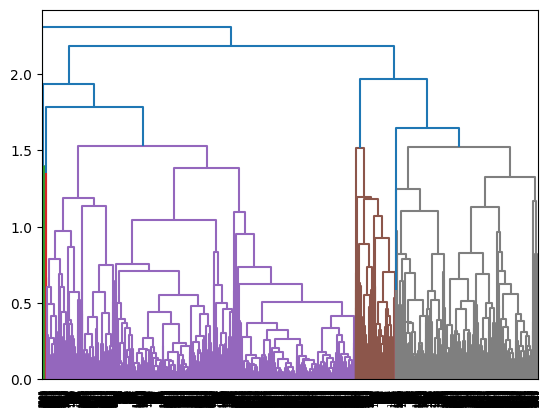

In [270]:
# create dendrogram
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(df, method='complete'))
plt.show()

In [271]:
# create clusters
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
hc.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [272]:
yhc = hc.fit_predict(df)
yhc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 2, 0, 0])

In [273]:
df_eda["h_cluster"] = yhc
df_eda

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_cluster
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,2
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


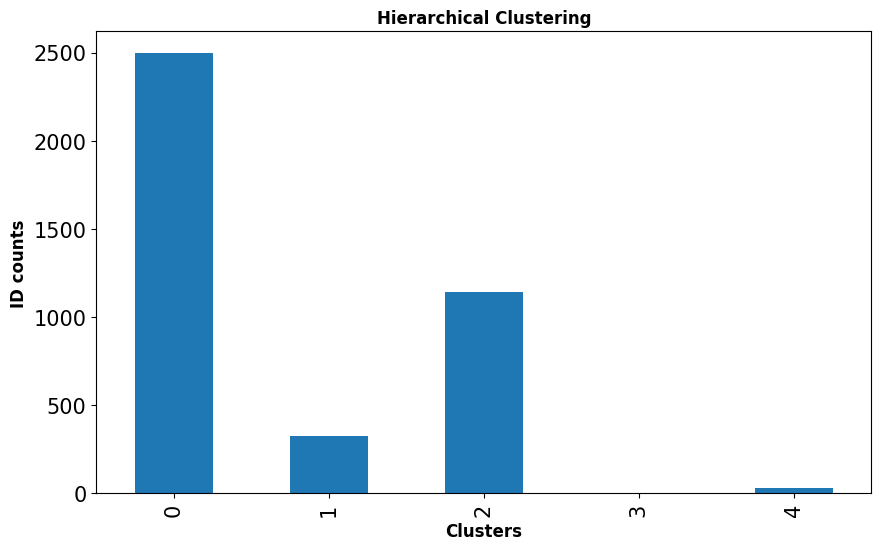

In [274]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df_eda.groupby(['h_cluster']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# **K MEANS**

In [275]:
df = df_eda_norm
df


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [276]:
#find the optimum number of clusters

from sklearn.cluster import KMeans

In [277]:
#inertia calculates the within cluster sum of squares

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [278]:
wcss

[1830.793212858411,
 823.6756984125209,
 625.1684881570724,
 436.70885761932567,
 348.9433217254141,
 315.31559648428936,
 287.73076207313125,
 263.214299891393,
 243.92721754767044,
 231.7988392842746]

<Axes: >

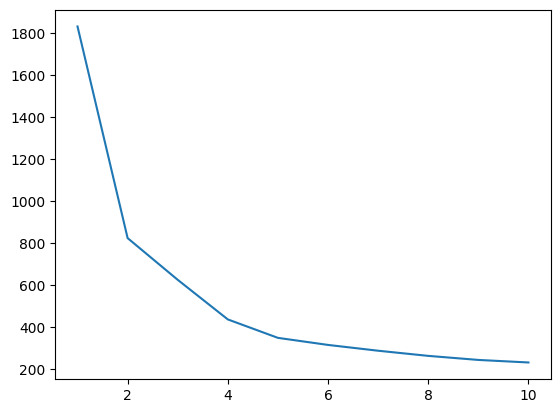

In [279]:
sns.lineplot(x=range(1,11),y=wcss)


In [280]:
# Consider cluster = 4
kmeans = KMeans(n_clusters=4)
predict=kmeans.fit_predict(df.iloc[:,1:])
predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

In [281]:
df_eda["k_cluster"] =kmeans.labels_
df_eda

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_cluster,k_cluster
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0,0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0,0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0,0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0,0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2,1
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2,1
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,2,2
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0,0


In [282]:
kmeans.cluster_centers_


array([[ 8.28362120e-03,  2.31945177e-02,  8.96151819e-03,
         1.05429626e-03,  1.26482465e-02,  7.54496083e-02,
         7.35308092e-03,  1.24327389e-02,  4.36111859e-01,
         7.21644966e-16],
       [ 2.60542873e-02,  3.90044577e-02,  1.63447251e-02,
         2.22882615e-03,  3.35642727e-02,  1.21825219e-01,
         3.34267751e-02,  5.94073285e-02,  5.22892182e-01,
         1.00000000e+00],
       [ 1.77912301e-02,  7.28960396e-01,  6.18811881e-04,
         6.49752475e-03,  1.72970238e-01,  2.34903868e-01,
         2.31602349e-02,  4.04212591e-02,  5.86139300e-01,
         1.00000000e+00],
       [ 6.55837114e-03,  6.44122383e-01,  8.05152979e-04,
         5.63607085e-03,  1.18636504e-01,  2.00595439e-01,
         7.31260853e-03,  1.19405706e-02,  5.34640411e-01,
        -2.77555756e-16]])

In [283]:
df1 = df_eda.groupby("k_cluster").mean().reset_index()
df1

,k_cluster,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_cluster
0,0,0.568004,0.023901,0.008284,0.023195,0.008962,0.001054,0.012648,0.075450,0.007353,0.012433,0.436112,0.0,0.052715
1,1,0.473573,0.048995,0.026054,0.039004,0.016345,0.002229,0.033564,0.121825,0.033427,0.059407,0.522892,1.0,2.014859
2,2,0.400999,0.063535,0.017791,0.728960,0.000619,0.006498,0.172970,0.234904,0.023160,0.040421,0.586139,1.0,1.600248
3,3,0.455836,0.069234,0.006558,0.644122,0.000805,0.005636,0.118637,0.200595,0.007313,0.011941,0.534640,0.0,0.000000


# **DBSCAN**

In [284]:
df = df_eda_norm
from sklearn.cluster import DBSCAN
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [285]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=8)#suppose nieghbour = 8

nbrs = nn.fit(df)

distances,indices = nbrs.kneighbors(df)

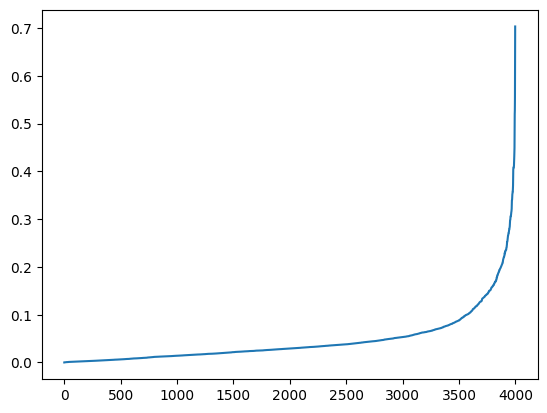

In [286]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)

In [287]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit_predict(df)

array([0, 0, 0, ..., 4, 0, 0])

In [288]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 4, 0, 0])

In [289]:
df_eda['DB_cluster']=dbscan.labels_
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [290]:
# Use pandas filtering and get noisy datapoints -1
df_eda[df_eda['DB_cluster']==-1]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_cluster,k_cluster,DB_cluster
8,0.001990,0.259850,0.000000,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0,2,2,-1
65,0.016169,0.031624,0.000000,0.50,0.0,0.0,0.128058,0.523256,0.180095,0.547170,0.822763,1.0,2,2,-1
70,0.017662,0.049511,0.451292,0.25,0.0,0.0,0.058540,0.186047,0.037317,0.075472,0.936098,0.0,0,0,-1
87,0.022139,0.357498,0.000000,0.50,0.0,0.0,0.081241,0.255814,0.038940,0.150943,0.822040,0.0,0,3,-1
94,0.023881,0.108837,0.000000,1.00,0.0,0.0,0.420422,0.453488,0.095726,0.301887,0.816976,1.0,1,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3851,0.963433,0.007008,0.000000,0.00,0.5,0.0,0.030715,0.162791,0.032450,0.037736,0.199421,1.0,2,1,-1
3883,0.971393,0.074005,0.000000,1.00,0.0,0.0,0.721164,0.174419,0.000000,0.000000,0.194116,1.0,1,2,-1
3897,0.974876,0.105483,0.264980,0.50,0.0,0.0,0.069090,0.232558,0.081124,0.094340,0.188932,1.0,2,2,-1
3911,0.978358,0.032802,0.203893,0.00,0.0,0.0,0.030734,0.220930,0.133173,0.301887,0.186882,0.0,0,0,-1


In [291]:
from sklearn.metrics import silhouette_score
silhouette_score(df_eda,df_eda['DB_cluster'])

0.76273264560191

In [292]:
#All clusters in one dataframe
df_eda

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_cluster,k_cluster,DB_cluster
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0,0,0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0,0,0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0,0,0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0,0,0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2,1,3
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2,1,3
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,2,2,4
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0,0,0
